# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

# day 95 

In [1]:
# CODE HERE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [13]:
#CODE HERE
df.isna().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [4]:
df = df.dropna()
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [5]:
df.isna().sum()

label     0
review    0
dtype: int64

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [21]:
st = 'George is a dick'

st.isspace()

False

In [22]:
st = ' '

st.isspace()

True

In [5]:
# str.isspace() method returns the cells with empty spaces

boolean = df['review'].str.isspace()

df[boolean]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [15]:
df[boolean].index

Int64Index([  57,   71,  147,  151,  283,  307,  313,  323,  343,  351,  427,
             501,  633,  675,  815,  851,  977, 1079, 1299, 1455, 1493, 1525,
            1531, 1763, 1851, 1905, 1993],
           dtype='int64')

In [6]:
# removing blank celled reviews and associated label

df = df.drop(df[boolean].index)

df


,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


27

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [7]:
#CODE HERE

df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [50]:
df[df['label'] == 'neg']

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
...,...,...
1985,neg,"the real blonde ( r ) a woman's face , an arm ..."
1986,neg,* * * the following review contains spoilers ...
1987,neg,""" book "" should have remained in shadows \r\n..."
1991,neg,"all right , all right , we get the point : des..."


In [51]:
# viewing only negative reiviews

df[df['label'] == 'neg']['review']

0       how do films like mouse hunt get into theatres...
1       some talented actresses are blessed with a dem...
4       my first press screening of 1998 and already i...
5       to put it bluntly , ed wood would have been pr...
6       synopsis : melissa , a mentally-disturbed woma...
                              ...                        
1985    the real blonde ( r ) a woman's face , an arm ...
1986     * * * the following review contains spoilers ...
1987     " book " should have remained in shadows \r\n...
1991    all right , all right , we get the point : des...
1992    say , tell me if you've seen this before : a c...
Name: review, Length: 969, dtype: object

In [9]:
#CODE HERE

# for negative reviews

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

matrix = cv.fit_transform(df[df['label'] == 'neg']['review'])

freq = zip(cv.get_feature_names_out(),matrix.sum(axis=0).tolist()[0])

print('Top twenty negative words')
print(sorted(freq,key= lambda x: -x[1])[0:20])



# In the code sorted(freq, key=lambda x: -x[1]), the lambda function lambda x: -x[1] is used to sort the list freq 
# by the second element of each tuple in descending order. The lambda function takes a single argument x and 
# returns the negative value of the second element of x. This means that the elements of freq will be sorted in 
# decreasing order of their second element.
#For example, if freq is the list [(1, 2), (3, 4), (5, 6)] then the sorted list will be [(5, 6), (3, 4), (1, 2)].



Top twenty negative words
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [10]:
# for positives

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

# get the matrix only for positive reviews
# the matrix has words in columns and counts in rows 
matrix = cv.fit_transform(df[df['label'] == 'pos']['review'])

# returns a bunch of tuples containing word and its frequencies
freq = zip(cv.get_feature_names_out(),matrix.sum(axis=0).tolist()[0])



# printing the list freq and displaying it descending order therfore the -x[1]
# we are sorting based on the second element of the tuple

print('Top 20 words on positive words')
print(sorted(freq,key = lambda x: -x[1])[0:20])

Top 20 words on positive words
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [90]:
# know how zip function works

# it creates a tuple. 
list(zip('apple',range(0,5)))

[('a', 0), ('p', 1), ('p', 2), ('l', 3), ('e', 4)]

In [85]:
# the matrix has rows in columns and counts in rows therefore when we sum the matrix we sum it based on the counts(axis=0)

matrix.sum(axis=0)

matrix([[ 2, 55,  1, ..., 14,  1,  2]], dtype=int64)

In [75]:
# it is a matrix [[]]
matrix.sum(axis=0)


matrix([[ 2, 55,  1, ..., 14,  1,  2]], dtype=int64)

In [76]:
# converting that to a list

matrix.sum(axis=0).tolist()

[[2,
  55,
  1,
  7,
  1,
  183,
  38,
  4,
  1,
  1,
  3,
  2,
  1,
  3,
  2,
  1,
  3,
  14,
  3,
  1,
  1,
  1,
  1,
  29,
  1,
  1,
  1,
  2,
  1,
  1,
  44,
  3,
  1,
  1,
  7,
  1,
  5,
  16,
  1,
  1,
  4,
  35,
  3,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  16,
  2,
  1,
  2,
  1,
  1,
  3,
  2,
  3,
  41,
  1,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  16,
  6,
  1,
  2,
  1,
  2,
  1,
  1,
  2,
  1,
  4,
  12,
  3,
  1,
  7,
  2,
  2,
  1,
  1,
  3,
  5,
  2,
  1,
  2,
  3,
  2,
  3,
  7,
  3,
  2,
  3,
  2,
  2,
  1,
  5,
  1,
  1,
  10,
  8,
  1,
  2,
  2,
  1,
  5,
  3,
  3,
  14,
  22,
  6,
  4,
  4,
  2,
  1,
  8,
  5,
  9,
  9,
  26,
  10,
  8,
  12,
  5,
  8,
  3,
  14,
  7,
  10,
  12,
  15,
  6,
  1,
  5,
  15,
  10,
  10,
  11,
  11,
  8,
  15,
  13,
  14,
  17,
  22,
  23,
  32,
  39,
  67,
  65,
  1,
  59,
  17,
  3,
  42,
  11,
  24,
  26,
  1,
  3,
  1,
  1,
  3,
  1,
  2,
  1,
  1,
  1,
  1,
  15,
  10,
  1,
  1,
  6,
  12,
  1,
  5,
  11,
  2,
  1,
  

In [78]:
# accessing the first list of the double list

matrix.sum(axis=0).tolist()[0]

[2,
 55,
 1,
 7,
 1,
 183,
 38,
 4,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 1,
 3,
 14,
 3,
 1,
 1,
 1,
 1,
 29,
 1,
 1,
 1,
 2,
 1,
 1,
 44,
 3,
 1,
 1,
 7,
 1,
 5,
 16,
 1,
 1,
 4,
 35,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 16,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 41,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 16,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 4,
 12,
 3,
 1,
 7,
 2,
 2,
 1,
 1,
 3,
 5,
 2,
 1,
 2,
 3,
 2,
 3,
 7,
 3,
 2,
 3,
 2,
 2,
 1,
 5,
 1,
 1,
 10,
 8,
 1,
 2,
 2,
 1,
 5,
 3,
 3,
 14,
 22,
 6,
 4,
 4,
 2,
 1,
 8,
 5,
 9,
 9,
 26,
 10,
 8,
 12,
 5,
 8,
 3,
 14,
 7,
 10,
 12,
 15,
 6,
 1,
 5,
 15,
 10,
 10,
 11,
 11,
 8,
 15,
 13,
 14,
 17,
 22,
 23,
 32,
 39,
 67,
 65,
 1,
 59,
 17,
 3,
 42,
 11,
 24,
 26,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 15,
 10,
 1,
 1,
 6,
 12,
 1,
 5,
 11,
 2,
 1,
 2,
 22,
 2,
 3,
 4,
 1,
 6,
 4,
 1,
 1,
 1,
 6,
 1,
 4,
 2,
 41,
 8,
 1,
 1,
 7,
 1,
 1,
 6,
 1,
 1,
 2,
 12,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 5,
 4,
 25,
 1,
 5,
 3,
 4,
 1,
 1,


In [67]:
lis = [1,2,3,4,5]

sorted(lis)

[1, 2, 3, 4, 5]

In [70]:
sorted(lis,reverse=True)

[5, 4, 3, 2, 1]

In [ ]:
print (sorted(freq, key=lambda x: -x[1])[0:20])


In [43]:
print(freq)

In [96]:
cv.get_feature_names_out()[100:500]

array(['1940s', '1941', '1943', '1944', '1945', '1946', '1947', '1948',
       '1949', '1950', '1950s', '1951', '1953', '1954', '1955', '1957',
       '1958', '1959', '1960', '1960s', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1970s', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1990s', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1998s', '1999', '19th', '1st',
       '20', '200', '2000', '2001', '2010', '2013', '2015', '2023',
       '2029', '2040', '2050', '2058', '2065', '209', '20somethings',
       '20th', '21', '216', '21a', '21st', '22', '2259', '23', '24',
       '2400', '2470', '24th', '25', '250', '25th', '26', '26min', '27',
       '28', '280', '289', '28th', '29', '2d', '2nd', '2th', '30', '300',
       '3000', '30th', '31', '310', '32', '33', '34', '3411', '34th',
  

In [38]:
matrix.sum(axis=0)

matrix([[  7, 115,   1, ...,   2,   2,   1]], dtype=int64)

freq.tolist()[0]


# understand freq well

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [11]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [37]:
#CODE HERE

x = df['review']
y = df['label']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=101)



### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [38]:
#CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

pipe.fit(x_train,y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [35]:
prediction = pipe.predict(x_test)
actual = y_test

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

def report(model):
    
    print(classification_report(actual,prediction))
    
    ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

              precision    recall  f1-score   support

         neg       0.81      0.88      0.84       238
         pos       0.87      0.81      0.84       247

    accuracy                           0.84       485
   macro avg       0.84      0.84      0.84       485
weighted avg       0.84      0.84      0.84       485



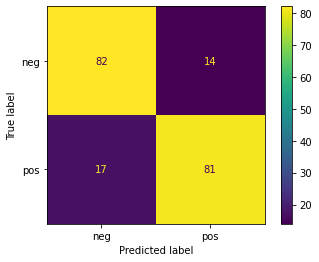

In [39]:
#CODE HERE
report(pipe)




    
    

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



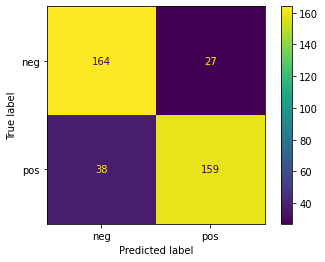

## Great job!